In [1]:
import os
import torch
import pandas as pd

import clip
import utils
import data_utils
import similarity
import matplotlib
from experiments import text_colorings
from matplotlib import pyplot as plt
import collections

import clip_dissect_activation_pipeline as cdp


In [2]:
# Initializing different test settings
settings = {'layer1': {"target_name":'resnet50', "target_layer": 'layer1', "neurons_to_display": "CLIP-Dissect"},
            'layer2': {"target_name":'resnet50', "target_layer": 'layer2', "neurons_to_display": "CLIP-Dissect"},
            'layer3': {"target_name":'resnet50', "target_layer": 'layer3', "neurons_to_display": "CLIP-Dissect"},
            'layer4': {"target_name":'resnet50', "target_layer": 'layer4', "neurons_to_display": "CLIP-Dissect"}
           }

layers = ['layer1','layer2','layer3','layer4']

In [3]:
# Dictionary to store stability scores for each configuration
stability_scores = {}

# Run the analysis for each configuration and store the results and stability scores
results = {}
results['config_broden_imagenet_softwpmi'], stability_scores['config_broden_imagenet_softwpmi_5_10'], stability_scores['config_broden_imagenet_softwpmi_5_16'] = cdp.run_clip_dissect_analysis(layers, settings, 'broden', 'data/imagenet_labels.txt', similarity.soft_wpmi)
results['config_broden_imagenet_wpmi'], stability_scores['config_broden_imagenet_wpmi_5_10'], stability_scores['config_broden_imagenet_wpmi_5_16'] = cdp.run_clip_dissect_analysis(layers, settings, 'broden', 'data/imagenet_labels.txt', similarity.wpmi)
results['config_broden_10k_softwpmi'], stability_scores['config_broden_10k_softwpmi_5_10'], stability_scores['config_broden_10k_softwpmi_5_16'] = cdp.run_clip_dissect_analysis(layers, settings, 'broden', 'data/10k.txt', similarity.soft_wpmi)
results['config_broden_10k_wpmi'], stability_scores['config_broden_10k_wpmi_5_10'], stability_scores['config_broden_10k_wpmi_5_16'] = cdp.run_clip_dissect_analysis(layers, settings, 'broden', 'data/10k.txt', similarity.wpmi)


100%|██████████| 256/256 [00:00<00:00, 2356.14it/s]


torch.Size([256, 1000])


100%|██████████| 512/512 [00:00<00:00, 2848.13it/s]


torch.Size([512, 1000])


100%|██████████| 1024/1024 [00:00<00:00, 2179.07it/s]


torch.Size([1024, 1000])


100%|██████████| 2048/2048 [00:00<00:00, 2086.27it/s]


torch.Size([2048, 1000])
Stability Score from k=5 to k=10: 99.94791666666667%
Stability Score from k=5 to k=16: 99.97395833333333%


100%|██████████| 2048/2048 [00:00<00:00, 6229.09it/s]


Stability Score from k=5 to k=10: 100.0%
Stability Score from k=5 to k=16: 99.97395833333333%


100%|██████████| 256/256 [00:00<00:00, 516.13it/s]


torch.Size([256, 9894])


100%|██████████| 512/512 [00:01<00:00, 312.66it/s]


torch.Size([512, 9894])


100%|██████████| 1024/1024 [00:02<00:00, 507.83it/s]


torch.Size([1024, 9894])


100%|██████████| 2048/2048 [00:03<00:00, 595.18it/s]


torch.Size([2048, 9894])
Stability Score from k=5 to k=10: 99.86979166666666%
Stability Score from k=5 to k=16: 99.84375%


100%|██████████| 2048/2048 [00:02<00:00, 907.35it/s] 


Stability Score from k=5 to k=10: 100.0%
Stability Score from k=5 to k=16: 100.0%


In [7]:
print(results)

{'config_broden_imagenet_softwpmi':        Layer  Neuron ID                                         Labels k=5  \
0     layer1          0  [wool, woolen, woollen, quilt, comforter, comf...   
1     layer1          1  [feather boa, boa, sea anemone, anemone, sorre...   
2     layer1          2  [window screen, fire screen, fireguard, chainl...   
3     layer1          3  [radiator, bannister, banister, balustrade, ba...   
4     layer1          4  [ladybug, ladybeetle, lady beetle, ladybird, l...   
...      ...        ...                                                ...   
3835  layer4       2043  [crash helmet, moped, missile, cuirass, oil fi...   
3836  layer4       2044  [Staffordshire bullterrier, Staffordshire bull...   
3837  layer4       2045  [water snake, rock python, rock snake, Python ...   
3838  layer4       2046  [shoe shop, shoe-shop, shoe store, clog, geta,...   
3839  layer4       2047  [Petri dish, toilet seat, water jug, beer glas...   

                           

In [8]:
print(stability_scores)

{'config_broden_imagenet_softwpmi_5_10': 99.94791666666667, 'config_broden_imagenet_softwpmi_5_16': 99.97395833333333, 'config_broden_imagenet_wpmi_5_10': 100.0, 'config_broden_imagenet_wpmi_5_16': 99.97395833333333, 'config_broden_10k_softwpmi_5_10': 99.86979166666666, 'config_broden_10k_softwpmi_5_16': 99.84375, 'config_broden_10k_wpmi_5_10': 100.0, 'config_broden_10k_wpmi_5_16': 100.0}


In [4]:
# Combine individual results dataframes into one
combined_results = pd.concat(
    list(results.values()), 
    keys=list(results.keys()), 
    names=['Configuration', 'Index']
)

In [5]:
# Create a summary DataFrame for stability scores
stability_summary = pd.DataFrame(stability_scores, index=['Stability k=5 to k=10', 'Stability k=5 to k=16']).T
print(stability_summary)

                                      Stability k=5 to k=10  \
config_broden_imagenet_softwpmi_5_10              99.947917   
config_broden_imagenet_softwpmi_5_16              99.973958   
config_broden_imagenet_wpmi_5_10                 100.000000   
config_broden_imagenet_wpmi_5_16                  99.973958   
config_broden_10k_softwpmi_5_10                   99.869792   
config_broden_10k_softwpmi_5_16                   99.843750   
config_broden_10k_wpmi_5_10                      100.000000   
config_broden_10k_wpmi_5_16                      100.000000   

                                      Stability k=5 to k=16  
config_broden_imagenet_softwpmi_5_10              99.947917  
config_broden_imagenet_softwpmi_5_16              99.973958  
config_broden_imagenet_wpmi_5_10                 100.000000  
config_broden_imagenet_wpmi_5_16                  99.973958  
config_broden_10k_softwpmi_5_10                   99.869792  
config_broden_10k_softwpmi_5_16                   99.843750 

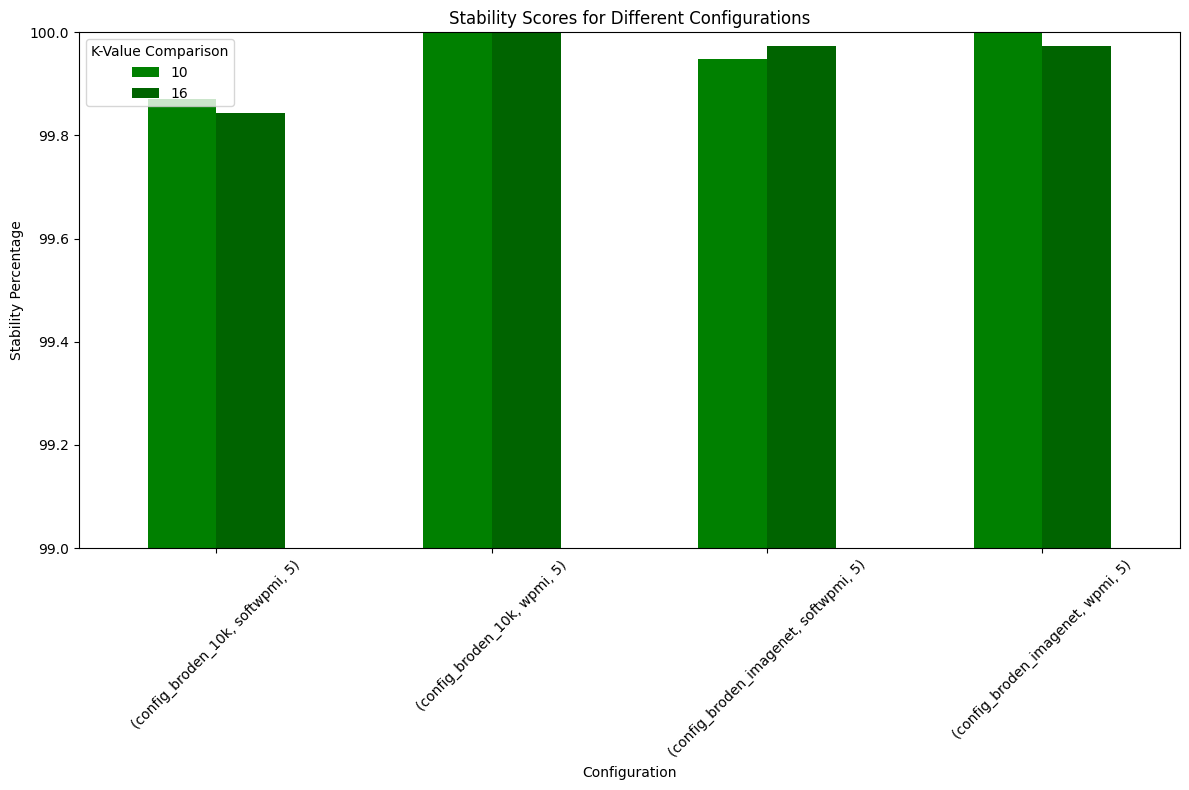

In [11]:
stability_df = pd.DataFrame(list(stability_scores.items()), columns=['Configuration', 'Stability Score'])
stability_df[['Config', 'Dataset', 'Similarity', 'K-Range']] = stability_df['Configuration'].str.rsplit('_', n=3, expand=True)
stability_df.drop(columns=['Configuration'], inplace=True)

# Pivoting the DataFrame for a better layout for the bar chart
pivot_df = stability_df.pivot(index=['Config', 'Dataset', 'Similarity'], columns='K-Range', values='Stability Score')
colors = ["green", "darkgreen"]

pivot_df.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Stability Scores for Different Configurations')
plt.ylabel('Stability Percentage')
plt.xlabel('Configuration')
plt.xticks(rotation=45)
plt.ylim(99, 100)  # Setting the y-axis limits
plt.legend(title='K-Value Comparison')
plt.tight_layout()

# Displaying the graph with specified colors
plt.show()

In [ ]:
# Further discussion will be that will these minor difference lead to change in accuracy